# student performance prediction

## # 1 Loading Libraries & Data

In [ ]:
# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
# 1.2 Read dataset
from google.colab import drive
drive.mount('/content/drive')  # Connect Google Drive
data = pd.read_csv('/content/drive/MyDrive/meachin learning/baru/performa siswa/Student_Performance (6).csv')

Mounted at /content/drive


In [ ]:
# 1.3 see top 5 rows

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
1.4 # see column data type and some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
#1.5 see precentege of missing value in each column

data.isna().sum() / data.shape[0]

,0
Hours Studied,0.0
Previous Scores,0.0
Extracurricular Activities,0.0
Sleep Hours,0.0
Sample Question Papers Practiced,0.0
Performance Index,0.0


In [ ]:
# 1.6  see dimensions

data.shape

(10000, 6)

In [ ]:
# 1.7 check if duplicated in data

data.duplicated().any()

True

In [ ]:
# 1.8 see quick info of numeric values

data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# 1.9 Quick info of category values
print(data.select_dtypes(include=['object']).describe())

       Extracurricular Activities
count                       10000
unique                          2
top                            No
freq                         5052


# # 2. Univariate Analysis & Visualizations

In [ ]:
print(data.columns)


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [ ]:
# 2.1  create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# 2.2 create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [ ]:
# 2.3  see uniqie values

data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

In [ ]:
#2.4 Function to visualize categorical column using count plot
def plot_categorical(column_name):
    sns.countplot(data=data, x=column_name)
    plt.title(f'Distribution of {column_name}')
    plt.show()

In [ ]:
# 2.5  Function to plot categorical data
def plot_categorical(column_name):
    if column_name in data.columns:
        sns.countplot(data=data, x=column_name)
        plt.title(f"Count plot for {column_name}")
        plt.show()
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [ ]:
#2.6  Check if the column exists before accessing it
if 'Extracurricular_Activities' in data.columns:
    print(data['Extracurricular_Activities'].value_counts())
else:
    print("Column 'Extracurricular_Activities' not found in the DataFrame.")

# Visualize a column using the function
plot_categorical('Sleep_Hours')

Column 'Extracurricular_Activities' not found in the DataFrame.
Column 'Sleep_Hours' not found in the DataFrame.


# # 3. Bivariate Analysis & Visualizations

In [ ]:
import pandas as pd

# 3.1 Membuat DataFrame berdasarkan data yang diberikan
data = pd.DataFrame({
    'Hours Studied': [7, 4, 8, 5, 3, 6],
    'Previous Scores': [99, 65, 48, 36, 66, 25],
    'Extracurricular Activities': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Sleep Hours': [9, 6, 7, 5, 8, 9],
    'Sample Question Papers Practiced': [1, 2, 5, 6, 0, 8],
    'Performance Index': [91.0, 65.0, 45.0, 36.0, 66.0, 23.0]
})

# Menampilkan data
print(data)


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               65                         No            6   
2              8               48                        Yes            7   
3              5               36                        Yes            5   
4              3               66                         No            8   
5              6               25                        Yes            9   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 5               45.0  
3                                 6               36.0  
4                                 0               66.0  
5                                 8               23.0  


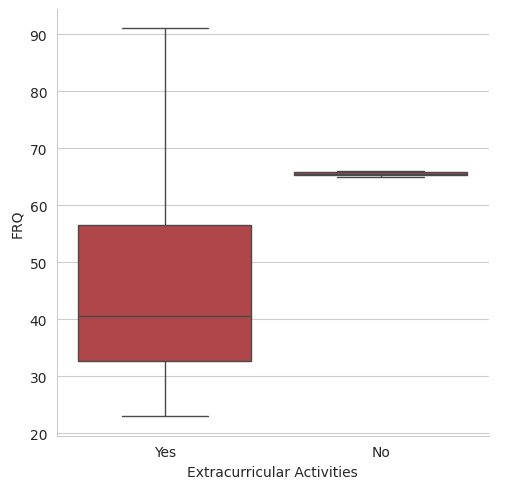

In [ ]:
#3.2  What is "	Extracurricular Activities" and "Performance Index" distribution

box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index") # call function i create it in cell 11

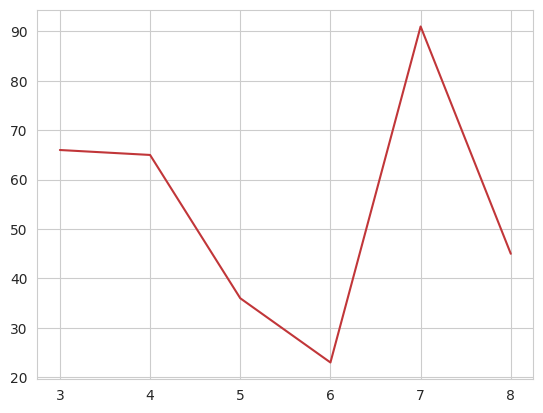

In [ ]:
#3.3  What is "Extracurricular Activities" and "Performance Index" distribution

avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

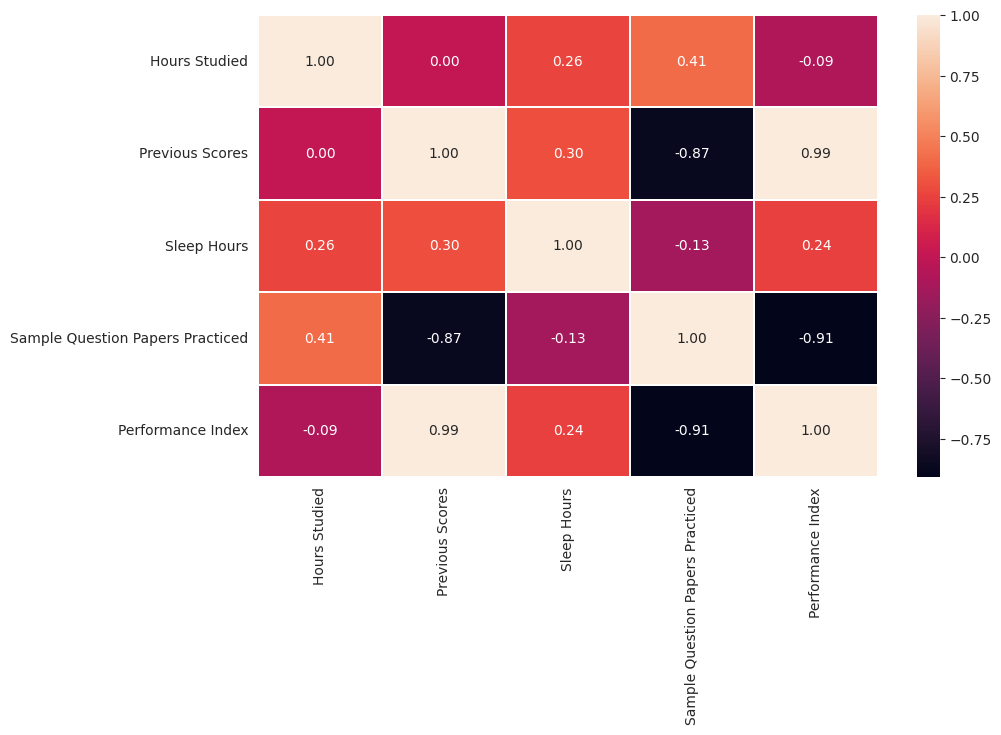

In [ ]:
#3.4  first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

## 4 Data Preprocessing

In [ ]:
4.1 # import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
# 4.2 create object from labelencoder

encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [ ]:
# 4.3 see sample of data

data.sample(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5,6,25,1,9,8,23.0
4,3,66,0,8,0,66.0


In [ ]:
# 4.4 Splitting data into Indipendent and Dependent Variable

Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [ ]:
# 4.5 see sample of train data

Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
3,5,36,1,5,6
5,6,25,1,9,8


In [ ]:
# 4.6 see sample of target label

Target

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
5,23.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [ ]:
# 4.7  see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (4, 5)
y_train shape:  (4,)
x_test shape:  (2, 5)
y_test shape:  (2,)


## 5 Modeling

In [ ]:
# 5.1  create object from RandomForestRegressor

model = LinearRegression()

In [ ]:
# 5.2 fit model

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 5.3  Importing the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create object from RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)



In [ ]:
# 5.4 Fit the model with training data
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

##  6. Evaluating Results

In [ ]:
#6.1  Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create object from RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model with training data
rf_model.fit(X_train, y_train)

# 6.1 Calculate the score of the model on the training data
train_score = rf_model.score(X_train, y_train)
print(f'Training Score (Random Forest): {train_score}')


Training Score (Random Forest): 0.897925993883792


In [ ]:
# 6.2 See predicted values
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 6.3 Real Values vs Predicted Values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison.head())

   Actual  Predicted
0    91.0      44.91
1    65.0      57.78


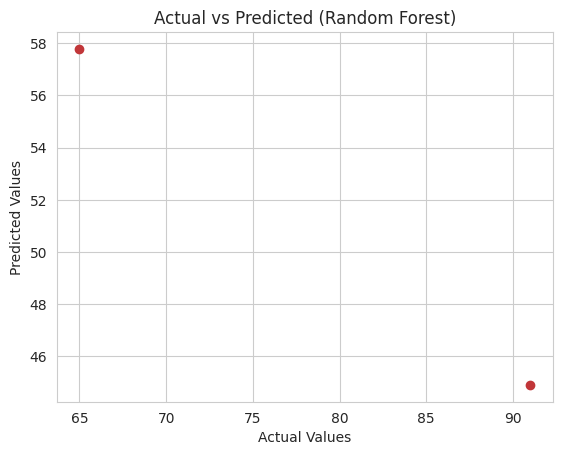

In [ ]:
# 6.4 Create scatter plot to see distribution
plt.scatter(y_test, y_pred_rf)
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# 6.5 Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Absolute Error (Random Forest): 26.655


In [ ]:
# 6.6 R^2 Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R^2 Score (Random Forest): {r2_rf}')

R^2 Score (Random Forest): -5.439102071005918


In [ ]:
# 6.7 Linear Regression Modeling and Evaluation
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
print(f'Mean Absolute Error (Linear Regression): {mae_lr}')
print(f'R^2 Score (Linear Regression): {r2_lr}')
print(f'Coefficients (Linear Regression): {lr_model.coef_}')
print(f'Intercept (Linear Regression): {lr_model.intercept_}')

Mean Absolute Error (Linear Regression): 1.4831306216547375
R^2 Score (Linear Regression): 0.9806191738122572
Coefficients (Linear Regression): [-0.57369003  0.92738701 -0.0562279  -0.38002512 -0.35247618]
Intercept (Linear Regression): 9.553728263775788


In [ ]:
import joblib

# Menyimpan model RandomForestRegressor
joblib.dump(rf_model, '/content/drive/MyDrive/rf_model.sav')

# Menyimpan model Linear Regression
joblib.dump(lr_model, '/content/drive/MyDrive/lr_model.sav')

print("Model telah disimpan sebagai file .sav di Google Drive.")


Model telah disimpan sebagai file .sav di Google Drive.
